#*Data Engineer Part*

#we did this part in python
# Step 1: Mount Google Drive
# Step 2: Install gdown library
# Step 3: Download the zipped file from Google Drive
# step 4 : Exract zipped files ansd Save the unzipped files to a new folder in Google Drive

In [ ]:
# we did this for fore once

output = '/content/drive/MyDrive/diploma files/Full Data/unzipped_data/CPTEVENTS.csv.zip'  # Change the extension based on your file type

# CHARTEVENTS.csv.gz
import zipfile
import gzip
import shutil
import os

def unzip_file(file_path, extract_to):
    # Check if the file is actually a zip file based on the magic number
    with open(file_path, 'rb') as f:
        magic_number = f.read(2)

    if magic_number == b'PK':  # Check for zip file signature
        # If it's a zip file, use zipfile to extract
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
    elif file_path.endswith('.gz'):
        # If it ends with .gz but isn't a zip, assume it's gzip
        filename = os.path.basename(file_path)
        output_filename = filename[:-3]
        output_path = os.path.join(extract_to, output_filename)
        with gzip.open(file_path, 'rb') as f_in:
            with open(output_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        print("Unsupported file type")



# Create a directory to extract files
extract_to = 'unzipped_data4'
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the file
unzip_file(output, extract_to)

# Step 5: Save the unzipped files to a new folder in Google Drive
new_folder = '/content/drive/My Drive/new_folder'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

shutil.move(extract_to, new_folder)


#  Mount Google Drive  in python runtime
# load files from gdrive to work dirctory

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install gdown library
!pip install gdown

# Step 3: Download the zipped file from Google Drive
import gdown


Mounted at /content/drive


In [ ]:
#https://drive.google.com/file/d/1831C7GivMRypMDEavG7aP73aavaPVQ3y/view?usp=drive_link
# Define the file IDs and output file names
file_ids = {
    "patients.csv": "10T3wGKue838Q2FcIBDrGqNdxMFRRKTvU",
    "icustays.csv": "1-M1Szb9Q2BllFATRFb0G7QDOanJYky74",
    "admissions.csv": "12z1lsYdNAbTFknGtm87kpvUTuGtQZhXM",
    "CHARTEVENTS SAMPLE.csv": "1831C7GivMRypMDEavG7aP73aavaPVQ3y"
}

# Download each file
for file_name, file_id in file_ids.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10T3wGKue838Q2FcIBDrGqNdxMFRRKTvU
To: /content/patients.csv
100%|██████████| 2.63M/2.63M [00:00<00:00, 71.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-M1Szb9Q2BllFATRFb0G7QDOanJYky74
To: /content/icustays.csv
100%|██████████| 6.36M/6.36M [00:00<00:00, 30.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=12z1lsYdNAbTFknGtm87kpvUTuGtQZhXM
To: /content/admissions.csv
100%|██████████| 12.5M/12.5M [00:00<00:00, 42.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1831C7GivMRypMDEavG7aP73aavaPVQ3y
To: /content/CHARTEVENTS SAMPLE.csv
100%|██████████| 89.0M/89.0M [00:00<00:00, 225MB/s]


# **EDA**
	Preprocessing Steps:
	Handle missing values and outliers.


In [ ]:
# Install and load dplyr
install.packages("dplyr")
install.packages("lubridate")
install.packages('ggplot2')
install.packages("stringr")
install.packages("caret")
install.packages("readr")

library(readr)
library(caret)
library(stringr)
library(ggplot2)
library(dplyr)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The follow

# 1- Read the CSV files
# 2-Display the data

In [ ]:
# Install necessary packages
# pROC: Provides tools for analyzing and visualizing receiver operating characteristic (ROC) curves, which are commonly used to evaluate the performance of binary classification models.
install.packages("pROC")
# PRROC: Another package for ROC curve analysis, offering additional functionalities like calculating partial AUC (Area Under the Curve) and drawing smooth ROC curves.
install.packages("PRROC")
# glmnet: A powerful package for fitting generalized linear models with elastic net regularization. It's essential for LASSO and ridge regression, which are useful for feature selection and handling multicollinearity.
install.packages("glmnet")
# randomForest: Implements the Random Forest algorithm, a popular ensemble learning method for both classification and regression tasks. It's known for its robustness and ability to handle high-dimensional data.
install.packages("randomForest")
# xgboost: Stands for Extreme Gradient Boosting, a highly efficient and effective gradient boosting algorithm. It's widely used for various machine learning tasks due to its performance and flexibility.
install.packages("xgboost")
# Metrics: Provides functions for calculating various evaluation metrics for machine learning models, such as accuracy, precision, recall, F1-score, and AUC.
install.packages("Metrics")
# data.table: An extremely fast and efficient package for working with data frames in R. It offers enhanced performance for data manipulation and aggregation, especially for large datasets.
install.packages("data.table")
# tibble: Provides a modern and cleaner way to create and work with data frames in R. Tibbles are stricter than traditional data frames and help prevent some common errors.
install.packages("tibble")


library(tibble)
library(data.table)
library(xgboost)
library(pROC)
library(glmnet)
library(randomForest) # For Random Forest Regressor
library(Metrics)
library(pROC)          # For ROC curve and AUC
library(PRROC)         # For precision-recall curve

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘xgboos

In [ ]:

patients <- read_csv("patients.csv")
icustays <- read_csv("icustays.csv")
admissions <- read_csv("admissions.csv")
chartevents <- read_csv("CHARTEVENTS SAMPLE.csv")


print(patients)
print(icustays)
print(admissions)
print(chartevents)

Rows: 46520 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): GENDER
dbl  (3): ROW_ID, SUBJECT_ID, EXPIRE_FLAG
dttm (4): DOB, DOD, DOD_HOSP, DOD_SSN

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 61532 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): DBSOURCE, FIRST_CAREUNIT, LAST_CAREUNIT
dbl  (7): ROW_ID, SUBJECT_ID, HADM_ID, ICUSTAY_ID, FIRST_WARDID, LAST_WARDID...
dttm (2): INTIME, OUTTIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 58976 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ADMISSION_TYPE, ADMISSION_LOCATION, DISCHARGE_LOCATION, INSURANCE,..

# A tibble: 46,520 × 8
   ROW_ID SUBJECT_ID GENDER DOB                 DOD                
    <dbl>      <dbl> <chr>  <dttm>              <dttm>             
 1    234        249 F      2075-03-13 00:00:00 NA                 
 2    235        250 F      2164-12-27 00:00:00 2188-11-22 00:00:00
 3    236        251 M      2090-03-15 00:00:00 NA                 
 4    237        252 M      2078-03-06 00:00:00 NA                 
 5    238        253 F      2089-11-26 00:00:00 NA                 
 6    239        255 M      2109-08-05 00:00:00 NA                 
 7    240        256 M      2086-07-31 00:00:00 NA                 
 8    241        257 F      2031-04-03 00:00:00 2121-07-08 00:00:00
 9    242        258 F      2124-09-19 00:00:00 NA                 
10    243        260 F      2105-03-23 00:00:00 NA                 
# ℹ 46,510 more rows
# ℹ 3 more variables: DOD_HOSP <dttm>, DOD_SSN <dttm>, EXPIRE_FLAG <dbl>
# A tibble: 61,532 × 12
   ROW_ID SUBJECT_ID HADM_ID ICUSTAY_ID DBS

# Merge patients and icustays on subject_id
# Display the merged data

In [ ]:

merged_data <- left_join(patients, icustays, by = "SUBJECT_ID")


print(merged_data)

# A tibble: 61,576 × 19
   ROW_ID.x SUBJECT_ID GENDER DOB                 DOD                
      <dbl>      <dbl> <chr>  <dttm>              <dttm>             
 1      234        249 F      2075-03-13 00:00:00 NA                 
 2      234        249 F      2075-03-13 00:00:00 NA                 
 3      234        249 F      2075-03-13 00:00:00 NA                 
 4      234        249 F      2075-03-13 00:00:00 NA                 
 5      234        249 F      2075-03-13 00:00:00 NA                 
 6      235        250 F      2164-12-27 00:00:00 2188-11-22 00:00:00
 7      236        251 M      2090-03-15 00:00:00 NA                 
 8      237        252 M      2078-03-06 00:00:00 NA                 
 9      237        252 M      2078-03-06 00:00:00 NA                 
10      238        253 F      2089-11-26 00:00:00 NA                 
# ℹ 61,566 more rows
# ℹ 14 more variables: DOD_HOSP <dttm>, DOD_SSN <dttm>, EXPIRE_FLAG <dbl>,
#   ROW_ID.y <dbl>, HADM_ID <dbl>, ICUST

# remove row_id
# Generate a basic summary of the merged_data

In [ ]:
merged_data <- merged_data %>%
  select(-contains("row_id"))

In [ ]:

summary(merged_data)

   SUBJECT_ID       GENDER               DOB                        
 Min.   :    2   Length:61576       Min.   :1800-07-02 00:00:00.00  
 1st Qu.:12042   Class :character   1st Qu.:2062-04-03 18:00:00.00  
 Median :24276   Mode  :character   Median :2093-11-17 00:00:00.00  
 Mean   :33878                      Mean   :2086-04-30 16:47:26.03  
 3rd Qu.:54178                      3rd Qu.:2121-12-13 00:00:00.00  
 Max.   :99999                      Max.   :2201-07-24 00:00:00.00  
                                                                    
      DOD                            DOD_HOSP                     
 Min.   :2100-06-19 00:00:00.00   Min.   :2100-06-19 00:00:00.00  
 1st Qu.:2127-11-09 00:00:00.00   1st Qu.:2127-09-18 00:00:00.00  
 Median :2152-08-21 00:00:00.00   Median :2151-12-01 00:00:00.00  
 Mean   :2152-11-16 03:20:21.71   Mean   :2152-08-01 07:55:40.90  
 3rd Qu.:2178-01-27 00:00:00.00   3rd Qu.:2177-08-31 00:00:00.00  
 Max.   :2211-06-10 00:00:00.00   Max.   :2209


#Check for missing values in the original dataset
#Check the range of DOB and INTIME
#Check the range of LOS

In [ ]:

sum(is.na(merged_data$DOB))
sum(is.na(merged_data$INTIME))
sum(is.na(merged_data$LOS))


summary(merged_data$DOB)
summary(merged_data$INTIME)


summary(merged_data$LOS)

[1] 0

[1] 44

[1] 54

                      Min.                    1st Qu. 
"1800-07-02 00:00:00.0000" "2062-04-03 18:00:00.0000" 
                    Median                       Mean 
"2093-11-17 00:00:00.0000" "2086-04-30 16:47:26.0439" 
                   3rd Qu.                       Max. 
"2121-12-13 00:00:00.0000" "2201-07-24 00:00:00.0000" 

                      Min.                    1st Qu. 
"2100-06-07 20:00:22.0000" "2126-03-01 09:44:44.0000" 
                    Median                       Mean 
"2151-01-07 22:00:42.5000" "2151-03-20 13:56:55.4380" 
                   3rd Qu.                       Max. 
"2176-07-07 22:16:04.5000" "2210-08-18 12:34:24.0000" 
                      NA's 
                      "44" 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  0.0001   1.1080   2.0922   4.9180   4.4832 173.0725       54 

# Remove rows with missing INTIME or LOS

In [ ]:

merged_data <- merged_data %>%
  filter(!is.na(INTIME) & !is.na(LOS))

In [ ]:
summary(merged_data)

   SUBJECT_ID       GENDER               DOB                        
 Min.   :    2   Length:61522       Min.   :1800-07-02 00:00:00.00  
 1st Qu.:12050   Class :character   1st Qu.:2062-03-26 12:00:00.00  
 Median :24285   Mode  :character   Median :2093-11-13 12:00:00.00  
 Mean   :33892                      Mean   :2086-04-27 06:37:29.11  
 3rd Qu.:54196                      3rd Qu.:2121-12-13 00:00:00.00  
 Max.   :99999                      Max.   :2201-07-24 00:00:00.00  
                                                                    
      DOD                            DOD_HOSP                     
 Min.   :2100-06-19 00:00:00.00   Min.   :2100-06-19 00:00:00.00  
 1st Qu.:2127-11-09 00:00:00.00   1st Qu.:2127-09-18 00:00:00.00  
 Median :2152-08-14 00:00:00.00   Median :2151-12-01 00:00:00.00  
 Mean   :2152-11-14 04:16:34.77   Mean   :2152-07-30 02:36:03.14  
 3rd Qu.:2178-01-27 00:00:00.00   3rd Qu.:2177-08-26 00:00:00.00  
 Max.   :2211-06-10 00:00:00.00   Max.   :2209

# plotting the distribution of pre-ICU length of stay, we learn that most patients were admitted to the ICU within a day of being admitted to the hospital.

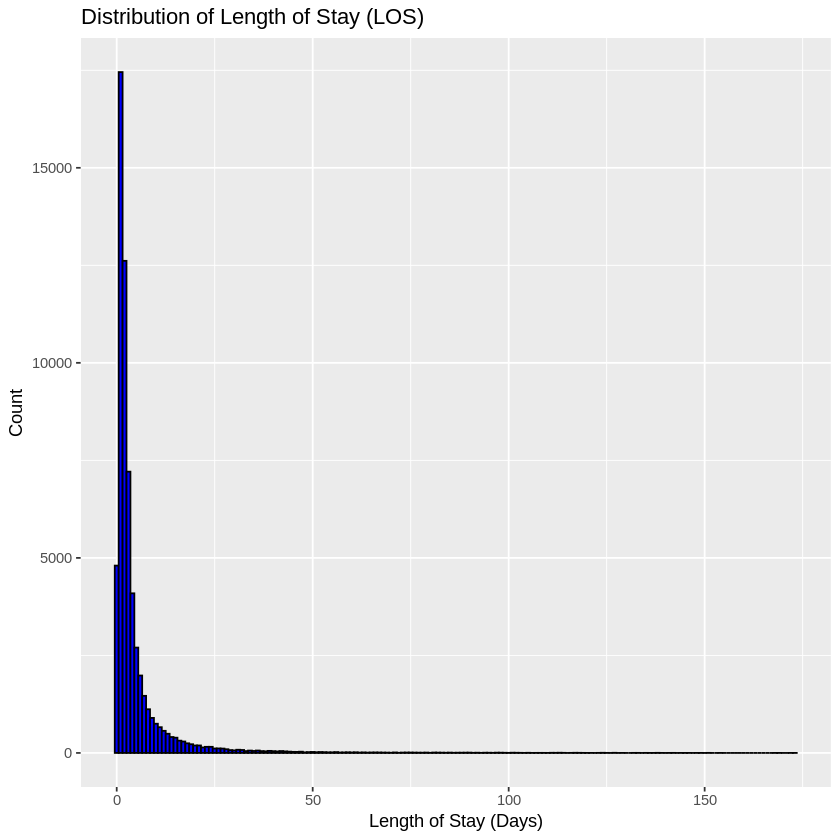

In [ ]:

ggplot(merged_data, aes(x = LOS)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(
    title = "Distribution of Length of Stay (LOS)",
    x = "Length of Stay (Days)",
    y = "Count"
  )

# combine the merged_data dataframe with admmissin data frame

In [ ]:
Full_data <- left_join(merged_data, admissions, by = c("HADM_ID","SUBJECT_ID"))



In [ ]:
summary(Full_data)

   SUBJECT_ID       GENDER               DOB                        
 Min.   :    2   Length:61522       Min.   :1800-07-02 00:00:00.00  
 1st Qu.:12050   Class :character   1st Qu.:2062-03-26 12:00:00.00  
 Median :24285   Mode  :character   Median :2093-11-13 12:00:00.00  
 Mean   :33892                      Mean   :2086-04-27 06:37:29.11  
 3rd Qu.:54196                      3rd Qu.:2121-12-13 00:00:00.00  
 Max.   :99999                      Max.   :2201-07-24 00:00:00.00  
                                                                    
      DOD                            DOD_HOSP                     
 Min.   :2100-06-19 00:00:00.00   Min.   :2100-06-19 00:00:00.00  
 1st Qu.:2127-11-09 00:00:00.00   1st Qu.:2127-09-18 00:00:00.00  
 Median :2152-08-14 00:00:00.00   Median :2151-12-01 00:00:00.00  
 Mean   :2152-11-14 04:16:34.77   Mean   :2152-07-30 02:36:03.14  
 3rd Qu.:2178-01-27 00:00:00.00   3rd Qu.:2177-08-26 00:00:00.00  
 Max.   :2211-06-10 00:00:00.00   Max.   :2209

# remove un nessery col

In [ ]:

Full_data <- Full_data %>%
  select(-DOD_SSN, -DOD_HOSP, -DOD,-DEATHTIME,-EDREGTIME)

# Display the updated data frame
print(Full_data)


# A tibble: 61,522 × 29
   SUBJECT_ID GENDER DOB                 EXPIRE_FLAG HADM_ID ICUSTAY_ID DBSOURCE
        <dbl> <chr>  <dttm>                    <dbl>   <dbl>      <dbl> <chr>   
 1        249 F      2075-03-13 00:00:00           0  116935     215044 carevue 
 2        249 F      2075-03-13 00:00:00           0  149546     269035 metavis…
 3        249 F      2075-03-13 00:00:00           0  149546     263055 metavis…
 4        249 F      2075-03-13 00:00:00           0  158975     282599 metavis…
 5        249 F      2075-03-13 00:00:00           0  158975     263882 metavis…
 6        250 F      2164-12-27 00:00:00           1  124271     205951 carevue 
 7        251 M      2090-03-15 00:00:00           0  117937     230307 carevue 
 8        252 M      2078-03-06 00:00:00           0  190159     221239 carevue 
 9        252 M      2078-03-06 00:00:00           0  193470     212805 carevue 
10        253 F      2089-11-26 00:00:00           0  176189     272631 carevue 
# ℹ 

# Replace NA values
# Replace NA values in datetime columns with a specific datetime value
# Replace NA values in numerical columns with 0
# Replace NA values in character columns with "Unknown"

In [ ]:
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [ ]:


datetime_cols <- sapply(Full_data, inherits, "POSIXct")
Full_data[datetime_cols] <- lapply(Full_data[datetime_cols], function(x) replace_na(x, as.POSIXct("1900-01-01 00:00:00")))


Full_data <- Full_data %>%
  mutate(across(where(is.numeric), ~ replace_na(., 0)))


Full_data <- Full_data %>%
  mutate(across(where(is.character), ~ replace_na(., "Unknown")))



In [ ]:
# Display the updated data frame
summary(Full_data)

   SUBJECT_ID       GENDER               DOB                        
 Min.   :    2   Length:61522       Min.   :1800-07-02 00:00:00.00  
 1st Qu.:12050   Class :character   1st Qu.:2062-03-26 12:00:00.00  
 Median :24285   Mode  :character   Median :2093-11-13 12:00:00.00  
 Mean   :33892                      Mean   :2086-04-27 06:37:29.11  
 3rd Qu.:54196                      3rd Qu.:2121-12-13 00:00:00.00  
 Max.   :99999                      Max.   :2201-07-24 00:00:00.00  
  EXPIRE_FLAG        HADM_ID         ICUSTAY_ID       DBSOURCE        
 Min.   :0.0000   Min.   :100001   Min.   :200001   Length:61522      
 1st Qu.:0.0000   1st Qu.:124931   1st Qu.:224933   Class :character  
 Median :0.0000   Median :149914   Median :249936   Mode  :character  
 Mean   :0.3932   Mean   :149954   Mean   :249961                     
 3rd Qu.:1.0000   3rd Qu.:174998   3rd Qu.:274974                     
 Max.   :1.0000   Max.   :199999   Max.   :299999                     
 FIRST_CAREUNIT     


# 1) Mortality Prediction:
#	Reliable binary classification models capable of identifying high-risk patients.




# Define categorical columns (assuming they don't change)
# Sample 10000 rows from the dataset (adjust if your dataset has fewer rows)

# Ensure the specified categorical columns are present in the dataset

The dummyVars function from the caret package is used to create dummy variables (one-hot encoding) for the categorical columns.

The predict function applies the dummy variable transformation to the dataset.

The resulting dummy variables (sample_data_encoded) are combined with the original dataset (sample_data) using cbind.

The original categorical columns are removed from the dataset since they have been replaced by their dummy-encoded versions.

In [ ]:

categorical_cols <- c("ADMISSION_TYPE", "ADMISSION_LOCATION",
                      "DISCHARGE_LOCATION", "INSURANCE", "LANGUAGE",
                      "RELIGION", "MARITAL_STATUS", "ETHNICITY", "DIAGNOSIS")


sample_data <- Full_data %>% sample_n(min(4000, nrow(Full_data)))


existing_categorical_cols <- intersect(categorical_cols, names(sample_data))

# Create dummy variables for the entire dataset
if (length(existing_categorical_cols) > 0) {
  dummies <- dummyVars(~ ., data = sample_data[, existing_categorical_cols])
  sample_data_encoded <- data.frame(predict(dummies, newdata = sample_data))

  # Combine with original sample data
  sample_data <- cbind(sample_data, sample_data_encoded)

  # Remove original categorical columns from the sample data
  sample_data <- sample_data[, !names(sample_data) %in% existing_categorical_cols]
}

# Remove columns with a single level
sample_data <- sample_data[, sapply(sample_data, function(col) length(unique(col)) > 1)]

# Define numerical columns
numerical_cols <- c("LOS")  # Replace with your actual numerical columns

# Normalize numerical features
sample_data <- sample_data %>%
  mutate(across(all_of(numerical_cols), scale))


# Split data into training and testing sets
Split Data: The dataset sample_data is split into training (train_data) and testing (test_data) sets based on the target variable HOSPITAL_EXPIRE_FLAG, with 80% of the data used for training.

Preprocess Data: Near-zero variance columns are removed, missing values are imputed using the mean, and any missing columns in the test set are added and filled with zeros to match the training set.

Train and Predict: A LASSO logistic regression model is trained on the preprocessed training data (X_train_imputed, y_train) and used to predict probabilities on the test set (X_test_imputed).

In [ ]:
# Load required libraries
#library(caret)         # For createDataPartition
#library(glmnet)        # For cv.glmnet
#library(glmnetUtils)   # For makeX


set.seed(42)
train_index <- createDataPartition(sample_data$HOSPITAL_EXPIRE_FLAG, p = 0.8, list = FALSE)
train_data <- sample_data[train_index, ]
test_data <- sample_data[-train_index, ]


X_train <- as.matrix(train_data[, -which(names(train_data) == "HOSPITAL_EXPIRE_FLAG")])
y_train <- train_data$HOSPITAL_EXPIRE_FLAG

# Define X and y for testing
X_test <- as.matrix(test_data[, -which(names(test_data) == "HOSPITAL_EXPIRE_FLAG")])
y_test <- test_data$HOSPITAL_EXPIRE_FLAG

# Remove near-zero variance columns from both X_train and X_test
nzv <- nearZeroVar(X_train)
if (length(nzv) > 0) {
  X_train <- X_train[, -nzv]
  X_test <- X_test[, -nzv]
}

# Impute missing values in X_train and X_test
X_train_imputed <- makeX(as.matrix(X_train), method = "mean")
X_test_imputed <- makeX(as.matrix(X_test), method = "mean")

# Add missing columns to X_test and fill with 0 (if necessary)
missing_cols <- setdiff(colnames(X_train_imputed), colnames(X_test_imputed))
if (length(missing_cols) > 0) {
  X_test_imputed <- cbind(X_test_imputed, matrix(0, nrow = nrow(X_test_imputed), ncol = length(missing_cols)))
  colnames(X_test_imputed) <- c(colnames(X_test_imputed)[1:(ncol(X_test_imputed) - length(missing_cols))], missing_cols)
}

# Ensure column order matches
X_test_imputed <- X_test_imputed[, colnames(X_train_imputed)]

# Train the LASSO model with imputed data
model_lasso <- cv.glmnet(X_train_imputed, y_train, family = "binomial", alpha = 1)

# Predict on the test set
predictions <- predict(model_lasso, newx = X_test_imputed, type = "response")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 712   0
         1   0  88
                                     
               Accuracy : 1          
                 95% CI : (0.9954, 1)
    No Information Rate : 0.89       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.89       
         Detection Rate : 0.89       
   Detection Prevalence : 0.89       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : 0          
                                     


Setting levels: control = 0, case = 1

Setting direction: controls < cases



ERROR: Error in auc(roc_curve): argument "predicted" is missing, with no default


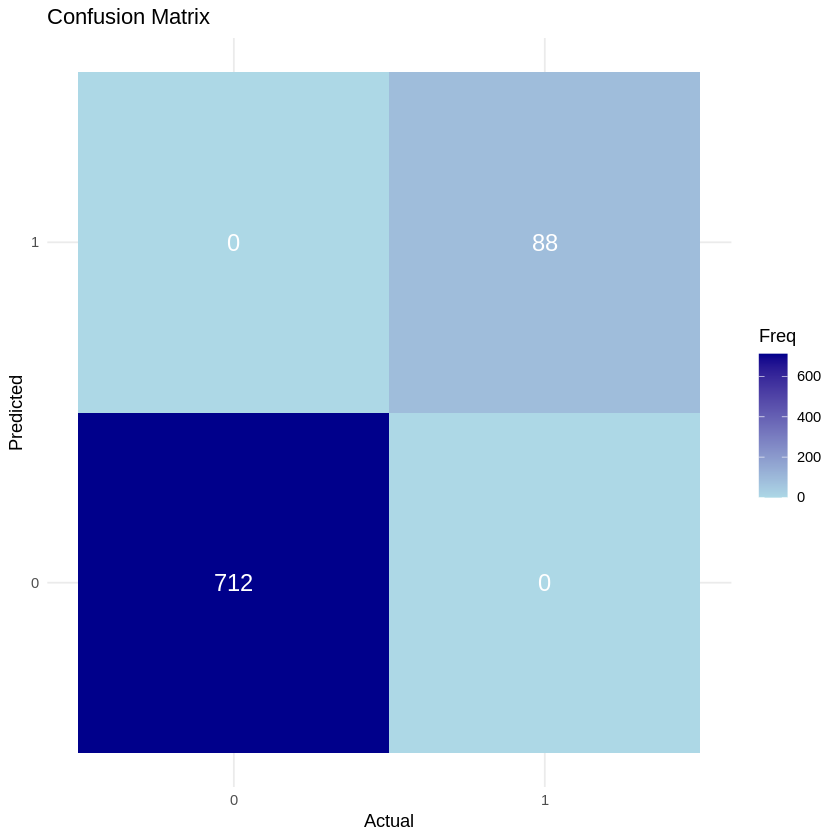

In [ ]:


# Ensure predictions is a numeric vector
predictions <- as.numeric(predictions)

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
predictions_binary <- ifelse(predictions > 0.5, 1, 0)

# Evaluate model performance using confusion matrix
conf_matrix <- confusionMatrix(as.factor(predictions_binary), as.factor(y_test))
print(conf_matrix)

# Plot confusion matrix
ggplot(as.data.frame(conf_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 5) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix", x = "Actual", y = "Predicted") +
  theme_minimal()

# Calculate ROC-AUC
roc_curve <- roc(response = y_test, predictor = predictions)  # Create ROC curve
auc_value <- auc(roc_curve)  # Calculate AUC from ROC curve
print(paste("AUC:", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)
abline(a = 0, b = 1, lty = 2, col = "red")
legend("bottomright", legend = paste("AUC =", round(auc_value, 3)), col = "blue", lwd = 2)

# Plot precision-recall curve
pr_curve <- pr.curve(scores.class0 = predictions, weights.class0 = y_test, curve = TRUE)
plot(pr_curve, main = "Precision-Recall Curve", col = "blue", lwd = 2)

# **2).	Length-of-Stay Prediction**

In [ ]:
# Define categorical columns (assuming they don't change)
categorical_cols <- c("ADMISSION_TYPE", "ADMISSION_LOCATION",
                      "DISCHARGE_LOCATION", "INSURANCE", "LANGUAGE",
                      "RELIGION", "MARITAL_STATUS", "ETHNICITY", "DIAGNOSIS")

# Sample 1000 rows from the dataset (adjust if your dataset has fewer rows)
sample_data1 <- Full_data %>% sample_n(min(3000, nrow(Full_data)))

# Ensure the specified categorical columns are present in the dataset
existing_categorical_cols <- intersect(categorical_cols, names(sample_data1))

# Create dummy variables for the entire dataset
if (length(existing_categorical_cols) > 0) {
  dummies <- dummyVars(~ ., data = sample_data1[, existing_categorical_cols])
  sample_data_encoded <- data.frame(predict(dummies, newdata = sample_data1))

  # Combine with original sample data
  sample_data1 <- cbind(sample_data1, sample_data_encoded)

  # Remove original categorical columns from the sample data
  sample_data1 <- sample_data1[, !names(sample_data1) %in% existing_categorical_cols]
}

# Remove columns with a single level
sample_data1 <- sample_data1[, sapply(sample_data1, function(col) length(unique(col)) > 1)]



In [ ]:
# Define target variable
target_column <- "LOS"  # Target column name

# Data splitting
set.seed(123)  # For reproducibility
train_idx <- createDataPartition(Full_data[[target_column]], p = 0.7, list = FALSE)
train_data <- sample_data1[train_idx, ]
temp_data <- sample_data1[-train_idx, ]

validation_idx <- createDataPartition(temp_data[[target_column]], p = 0.5, list = FALSE)
validation_data <- temp_data[validation_idx, ]
test_data <- temp_data[-validation_idx, ]


In [ ]:

# Remove rows with missing values in the target variable
train_data <- train_data[!is.na(train_data[[target_column]]), ]

# Remove rows with missing values in the predictor variables
train_data <- na.omit(train_data)


In [ ]:


# Feature selection using Recursive Feature Elimination (RFE)
rfe_control <- rfeControl(functions = rfFuncs, method = "cv", number = 5)
rfe_results <- rfe(train_data[, -which(names(train_data) == target_column)],
                   train_data[[target_column]],
                   sizes = c(1:10), rfeControl = rfe_control)

# Selected features
selected_features <- predictors(rfe_results)
train_data <- train_data[, c(selected_features, target_column)]
validation_data <- validation_data[, c(selected_features, target_column)]
test_data <- test_data[, c(selected_features, target_column)]



In [ ]:
# Model training and hyperparameter tuning

# 1. Linear Regression (Lasso)
lasso_grid <- expand.grid(alpha = 1, lambda = seq(0.001, 0.1, length = 10))
lasso_model <- train(as.formula(paste(target_column, "~ .")), data = train_data, method = "glmnet",
                     trControl = trainControl(method = "cv", number = 5),
                     tuneGrid = lasso_grid)



In [ ]:
# 2. Random Forest
rf_grid <- expand.grid(mtry = c(2, 5, 10))  # Corrected tuneGrid for Random Forest
rf_model <- train(as.formula(paste(target_column, "~ .")), data = train_data, method = "rf",
                  trControl = trainControl(method = "cv", number = 5),
                  tuneGrid = rf_grid)



In [ ]:
# 3. XGBoost
xgb_grid <- expand.grid(nrounds = c(100, 200),
                        max_depth = c(3, 6),
                        eta = c(0.01, 0.1),
                        gamma = 0,
                        colsample_bytree = 1,
                        min_child_weight = 1,
                        subsample = 1)
xgb_model <- train(as.formula(paste(target_column, "~ .")), data = train_data, method = "xgbTree",
                   trControl = trainControl(method = "cv", number = 5),
                   tuneGrid = xgb_grid)



[08:46:01] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:02] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:02] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:02] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:03] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:03] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:03] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:04] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:04] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[08:46:04] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [ ]:
print(lasso_model)
print(rf_model)
print(xgb_model)

glmnet 

2058 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1646, 1646, 1646, 1648, 1646 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared    MAE     
  0.001   10.08893  0.09945974  4.959920
  0.012   10.07911  0.10058894  4.950941
  0.023   10.06593  0.10250351  4.940934
  0.034   10.05559  0.10411242  4.931126
  0.045   10.04800  0.10536978  4.923031
  0.056   10.04316  0.10620840  4.917568
  0.067   10.04070  0.10665228  4.915690
  0.078   10.03789  0.10712322  4.911748
  0.089   10.03575  0.10735860  4.905146
  0.100   10.03459  0.10746185  4.897701

Tuning parameter 'alpha' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 1 and lambda = 0.1.
Random Forest 

2058 samples
  10 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1646, 1647, 1647, 1646, 1646 
R

In [ ]:
# Model evaluation function
evaluate_model <- function(model, data) {
  predictions <- predict(model, newdata = data)
  mae <- mean(abs(predictions - data[[target_column]]))  # Mean Absolute Error
  mse <- mean((predictions - data[[target_column]])^2)  # Mean Squared Error
  r2 <- cor(predictions, data[[target_column]])^2       # R-squared
  return(list(MAE = mae, MSE = mse, R2 = r2))
}

# Evaluate models on validation set
lasso_metrics <- evaluate_model(lasso_model, validation_data)
rf_metrics <- evaluate_model(rf_model, validation_data)
xgb_metrics <- evaluate_model(xgb_model, validation_data)


In [ ]:
# Compare validation metrics
validation_results <- data.frame(
  Model = c("Lasso", "Random Forest", "XGBoost"),
  MAE = c(lasso_metrics$MAE, rf_metrics$MAE, xgb_metrics$MAE),
  MSE = c(lasso_metrics$MSE, rf_metrics$MSE, xgb_metrics$MSE),
  R2 = c(lasso_metrics$R2, rf_metrics$R2, xgb_metrics$R2)
)

print("Validation Results:")
print(validation_results)

# Select the best model based on MAE
if (validation_results$MAE[1] == min(validation_results$MAE)) {
  best_model <- lasso_model
} else if (validation_results$MAE[2] == min(validation_results$MAE)) {
  best_model <- rf_model
} else {
  best_model <- xgb_model
}

# Check if the best model is valid
if (!inherits(best_model, "train")) {
  stop("The best model is not a valid 'train' object.")
}

# Evaluate the best model on the test set
test_metrics <- evaluate_model(best_model, test_data)
cat("Test Metrics for Best Model:\n", "MAE:", test_metrics$MAE, "MSE:", test_metrics$MSE, "R2:", test_metrics$R2, "\n")

[1] "Validation Results:"
          Model      MAE      MSE         R2
1         Lasso 4.379686 53.45670 0.07643870
2 Random Forest 3.728097 54.45622 0.09946482
3       XGBoost 3.801353 65.44804 0.02844088
Test Metrics for Best Model:
 MAE: 3.800464 MSE: 46.05119 R2: 0.1941197 


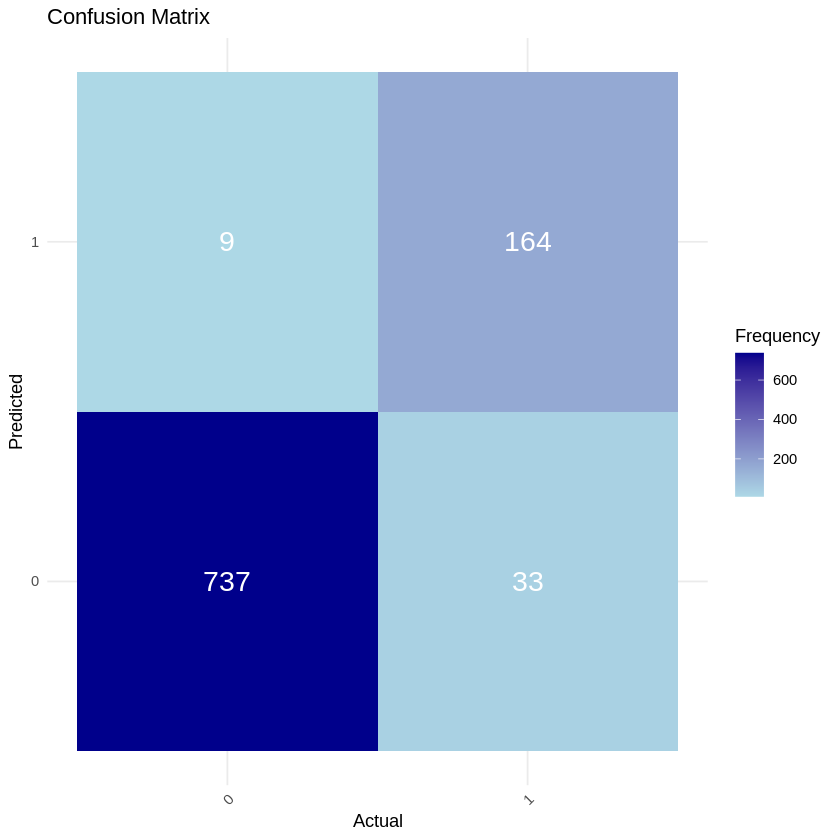

In [ ]:


# Convert confusion matrix to a data frame
conf_matrix_df <- as.data.frame(conf_matrix$table)

# Plot confusion matrix
ggplot(conf_matrix_df, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix",
       x = "Actual",
       y = "Predicted",
       fill = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3.	Readmission Prediction:
#	Effective prediction of patients at risk of 30-day readmission, aiding in care planning.


In [ ]:

# Filter rows where `hadm_id` is not null and `itemid` is in the specified list
filtered_df <- chartevents %>%
  filter(!is.na(HADM_ID) & ITEMID %in% c(
    615, 618, 220210, 224690,  # RespRate
    807, 811, 1529, 3745, 3744, 225664, 220621, 226537,  # Glucose
    211, 220045,  # HR
    51, 442, 455, 6701, 220179, 220050,  # SysBP
    8368, 8440, 8441, 8555, 220180, 220051,  # DiasBP
    223761, 678, 223762, 676  # Temp
  ))

# Define a function to calculate temperature in Celsius
calculate_temp <- function(ITEMID, VALUENUM) {
  if (ITEMID %in% c(223761, 678) & VALUENUM > 70 & VALUENUM < 120) {
    return((VALUENUM - 32) / 1.8)
  } else if (ITEMID %in% c(223762, 676) & VALUENUM > 10 & VALUENUM < 50) {
    return(VALUENUM)
  } else {
    return(NA)
  }
}

# Apply the temperature calculation
filtered_df <- filtered_df %>%
  mutate(temp_calculated = mapply(calculate_temp, ITEMID, VALUENUM))

# Group by `hadm_id` and calculate the required aggregations
chartevents_agg <- filtered_df %>%
  group_by(HADM_ID) %>%
  summarise(
    RespRate_Min = min(VALUENUM[ITEMID %in% c(615, 618, 220210, 224690) & VALUENUM > 0 & VALUENUM < 70], na.rm = TRUE),
    RespRate_Max = max(VALUENUM[ITEMID %in% c(615, 618, 220210, 224690) & VALUENUM > 0 & VALUENUM < 70], na.rm = TRUE),
    RespRate_Mean = mean(VALUENUM[ITEMID %in% c(615, 618, 220210, 224690) & VALUENUM > 0 & VALUENUM < 70], na.rm = TRUE),
    Glucose_Min = min(VALUENUM[ITEMID %in% c(807, 811, 1529, 3745, 3744, 225664, 220621, 226537) & VALUENUM > 0], na.rm = TRUE),
    Glucose_Max = max(VALUENUM[ITEMID %in% c(807, 811, 1529, 3745, 3744, 225664, 220621, 226537) & VALUENUM > 0], na.rm = TRUE),
    Glucose_Mean = mean(VALUENUM[ITEMID %in% c(807, 811, 1529, 3745, 3744, 225664, 220621, 226537) & VALUENUM > 0], na.rm = TRUE),
    HR_min = min(VALUENUM[ITEMID %in% c(211, 220045) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE),
    HR_max = max(VALUENUM[ITEMID %in% c(211, 220045) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE),
    HR_mean = round(mean(VALUENUM[ITEMID %in% c(211, 220045) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE), 2),
    SysBP_min = min(VALUENUM[ITEMID %in% c(51, 442, 455, 6701, 220179, 220050) & VALUENUM > 0 & VALUENUM < 400], na.rm = TRUE),
    SysBP_max = max(VALUENUM[ITEMID %in% c(51, 442, 455, 6701, 220179, 220050) & VALUENUM > 0 & VALUENUM < 400], na.rm = TRUE),
    SysBP_mean = round(mean(VALUENUM[ITEMID %in% c(51, 442, 455, 6701, 220179, 220050) & VALUENUM > 0 & VALUENUM < 400], na.rm = TRUE), 2),
    DiasBP_min = min(VALUENUM[ITEMID %in% c(8368, 8440, 8441, 8555, 220180, 220051) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE),
    DiasBP_max = max(VALUENUM[ITEMID %in% c(8368, 8440, 8441, 8555, 220180, 220051) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE),
    DiasBP_mean = round(mean(VALUENUM[ITEMID %in% c(8368, 8440, 8441, 8555, 220180, 220051) & VALUENUM > 0 & VALUENUM < 300], na.rm = TRUE), 2),
    temp_min = min(temp_calculated, na.rm = TRUE),
    temp_max = max(temp_calculated, na.rm = TRUE),
    temp_mean = round(mean(temp_calculated, na.rm = TRUE), 2)
  )

# Display the result
print(chartevents_agg)

Warning message:
“There were 1236 warnings in `summarise()`.
The first warning was:
ℹ In argument: `RespRate_Min = min(...)`.
ℹ In group 7: `HADM_ID = 100473`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1235 remaining warnings.”


# A tibble: 885 × 19
   HADM_ID RespRate_Min RespRate_Max RespRate_Mean Glucose_Min Glucose_Max
     <dbl>        <dbl>        <dbl>         <dbl>       <dbl>       <dbl>
 1  100009            8           37          23.9          93         268
 2  100020            8           27          15.1          79         101
 3  100068            7           31          17.2          55         189
 4  100182           11           27          17.3         115         249
 5  100336           16           29          24.1         104         680
 6  100361           11           30          15.8          64         170
 7  100473          Inf         -Inf         NaN            70         166
 8  100765            5           30          17.1          77         465
 9  100795            4           32          16.2         215         355
10  100889           11           22          17.1         122         160
# ℹ 875 more rows
# ℹ 13 more variables: Glucose_Mean <dbl>, HR_min <dbl>, HR_m

In [ ]:
summary(chartevents_agg)

    HADM_ID        RespRate_Min  RespRate_Max  RespRate_Mean    Glucose_Min 
 Min.   :100009   Min.   :  1   Min.   :-Inf   Min.   :10.30   Min.   :  2  
 1st Qu.:124661   1st Qu.:  9   1st Qu.:  22   1st Qu.:16.34   1st Qu.: 74  
 Median :148585   Median : 11   Median :  27   Median :18.63   Median : 90  
 Mean   :149206   Mean   :Inf   Mean   :-Inf   Mean   :18.99   Mean   :Inf  
 3rd Qu.:173581   3rd Qu.: 14   3rd Qu.:  33   3rd Qu.:21.40   3rd Qu.:106  
 Max.   :199622   Max.   :Inf   Max.   :  68   Max.   :40.50   Max.   :Inf  
                                               NA's   :122                  
  Glucose_Max      Glucose_Mean        HR_min        HR_max    
 Min.   :  -Inf   Min.   :  42.0   Min.   : 17   Min.   :-Inf  
 1st Qu.:   131   1st Qu.: 108.0   1st Qu.: 60   1st Qu.:  84  
 Median :   179   Median : 127.8   Median : 69   Median : 101  
 Mean   :  -Inf   Mean   : 143.1   Mean   :Inf   Mean   :-Inf  
 3rd Qu.:   266   3rd Qu.: 163.0   3rd Qu.: 81   3rd Qu.: 118  


In [ ]:
admits_df <- inner_join(Full_data, chartevents_agg, by = "HADM_ID")

In [ ]:
print(admits_df)

# A tibble: 943 × 47
   SUBJECT_ID GENDER DOB                 EXPIRE_FLAG HADM_ID ICUSTAY_ID DBSOURCE
        <dbl> <chr>  <dttm>                    <dbl>   <dbl>      <dbl> <chr>   
 1        249 F      2075-03-13 00:00:00           0  149546     269035 metavis…
 2        249 F      2075-03-13 00:00:00           0  149546     263055 metavis…
 3        249 F      2075-03-13 00:00:00           0  158975     282599 metavis…
 4        249 F      2075-03-13 00:00:00           0  158975     263882 metavis…
 5        256 M      2086-07-31 00:00:00           0  188869     254418 carevue 
 6        256 M      2086-07-31 00:00:00           0  108811     273229 carevue 
 7        256 M      2086-07-31 00:00:00           0  108811     263221 carevue 
 8        266 F      2090-12-17 00:00:00           0  186251     293876 metavis…
 9        665 M      2052-05-20 00:00:00           1  152089     220843 metavis…
10        665 M      2052-05-20 00:00:00           1  170157     281431 metavis…
# ℹ 933

In [ ]:
summary(admits_df)

   SUBJECT_ID       GENDER               DOB                        
 Min.   :   23   Length:943         Min.   :1801-02-10 00:00:00.00  
 1st Qu.: 2638   Class :character   1st Qu.:2061-08-17 00:00:00.00  
 Median : 5199   Mode  :character   Median :2084-03-11 00:00:00.00  
 Mean   : 5211                      Mean   :2075-03-12 03:29:12.28  
 3rd Qu.: 7809                      3rd Qu.:2112-10-20 12:00:00.00  
 Max.   :10694                      Max.   :2167-11-17 00:00:00.00  
                                                                    
  EXPIRE_FLAG        HADM_ID         ICUSTAY_ID       DBSOURCE        
 Min.   :0.0000   Min.   :100009   Min.   :200203   Length:943        
 1st Qu.:0.0000   1st Qu.:124448   1st Qu.:226004   Class :character  
 Median :1.0000   Median :148642   Median :250044   Mode  :character  
 Mean   :0.5122   Mean   :149131   Mean   :250459                     
 3rd Qu.:1.0000   3rd Qu.:173954   3rd Qu.:275214                     
 Max.   :1.0000   Max.

In [ ]:


# Initialize new columns
data_df <- admits_df%>%
  mutate(readmit_dt = 0,
         next_readmit_dt = 0,
         readmit_last_careunit = NA_character_)

# Loop through the data to calculate readmission time differences
for (idx in 2:nrow(data_df)) {
  if (data_df$SUBJECT_ID[idx] == data_df$SUBJECT_ID[idx - 1]) {
    prev_disch <- data_df$DISCHTIME[idx - 1]
    curr_adm <- data_df$ADMITTIME[idx]

    # Calculate time difference in hours
    dt <- as.numeric(difftime(curr_adm, prev_disch, units = "hours"))
    dt_hrs_calc <- round(dt, 2)

    # Update columns
    data_df$readmit_dt[idx] <- dt_hrs_calc
    data_df$next_readmit_dt[idx - 1] <- dt_hrs_calc
    data_df$readmit_last_careunit[idx] <- data_df$LAST_CAREUNIT[idx - 1]
  }
}

# Display the updated data
print(head(data_df))

# A tibble: 6 × 50
  SUBJECT_ID GENDER DOB                 EXPIRE_FLAG HADM_ID ICUSTAY_ID DBSOURCE 
       <dbl> <chr>  <dttm>                    <dbl>   <dbl>      <dbl> <chr>    
1        249 F      2075-03-13 00:00:00           0  149546     269035 metavisi…
2        249 F      2075-03-13 00:00:00           0  149546     263055 metavisi…
3        249 F      2075-03-13 00:00:00           0  158975     282599 metavisi…
4        249 F      2075-03-13 00:00:00           0  158975     263882 metavisi…
5        256 M      2086-07-31 00:00:00           0  188869     254418 carevue  
6        256 M      2086-07-31 00:00:00           0  108811     273229 carevue  
# ℹ 43 more variables: FIRST_CAREUNIT <chr>, LAST_CAREUNIT <chr>,
#   FIRST_WARDID <dbl>, LAST_WARDID <dbl>, INTIME <dttm>, OUTTIME <dttm>,
#   LOS <dbl>, ROW_ID <dbl>, ADMITTIME <dttm>, DISCHTIME <dttm>,
#   ADMISSION_TYPE <chr>, ADMISSION_LOCATION <chr>, DISCHARGE_LOCATION <chr>,
#   INSURANCE <chr>, LANGUAGE <chr>, RELIGION <chr

In [ ]:
# Define threshold in hours (30 days * 24 hours)
threshold <- 30 * 24

# Create the 'future_readmit' column based on the threshold
data_df <- data_df %>%
  mutate(future_readmit = case_when(
    next_readmit_dt == 0.0 ~ "No",           # If no readmission, label as "No"
    next_readmit_dt <= threshold ~ "Yes",    # If readmission within threshold, label as "Yes"
    TRUE ~ "No"                              # Otherwise, label as "No"
  ))

# Display the updated data
print(head(data_df))

# A tibble: 6 × 51
  SUBJECT_ID GENDER DOB                 EXPIRE_FLAG HADM_ID ICUSTAY_ID DBSOURCE 
       <dbl> <chr>  <dttm>                    <dbl>   <dbl>      <dbl> <chr>    
1        249 F      2075-03-13 00:00:00           0  149546     269035 metavisi…
2        249 F      2075-03-13 00:00:00           0  149546     263055 metavisi…
3        249 F      2075-03-13 00:00:00           0  158975     282599 metavisi…
4        249 F      2075-03-13 00:00:00           0  158975     263882 metavisi…
5        256 M      2086-07-31 00:00:00           0  188869     254418 carevue  
6        256 M      2086-07-31 00:00:00           0  108811     273229 carevue  
# ℹ 44 more variables: FIRST_CAREUNIT <chr>, LAST_CAREUNIT <chr>,
#   FIRST_WARDID <dbl>, LAST_WARDID <dbl>, INTIME <dttm>, OUTTIME <dttm>,
#   LOS <dbl>, ROW_ID <dbl>, ADMITTIME <dttm>, DISCHTIME <dttm>,
#   ADMISSION_TYPE <chr>, ADMISSION_LOCATION <chr>, DISCHARGE_LOCATION <chr>,
#   INSURANCE <chr>, LANGUAGE <chr>, RELIGION <chr

In [ ]:
# Print value counts
cat("Value counts:\n")
print(table(data_df$future_readmit))

# Print value proportions
cat("\nValue proportions:\n")
print(prop.table(table(data_df$future_readmit)))

Value counts:

 No Yes 
746 197 

Value proportions:

       No       Yes 
0.7910923 0.2089077 


In [ ]:
# Define label dataframe
will_readmit <- data_df$future_readmit == 'Yes'
y_df <- data.frame(label = as.integer(will_readmit))

# Define feature dataframe and split into numerical and categorical features
x_df <- data_df%>%
  select(-SUBJECT_ID, -HADM_ID, -ADMITTIME, -DISCHTIME, -FIRST_CAREUNIT, -LAST_CAREUNIT, -readmit_dt, -readmit_last_careunit, -future_readmit, -next_readmit_dt)

# Split into categorical and numerical features
x_df_cat <- x_df %>% select(GENDER, MARITAL_STATUS, INSURANCE)
x_df_num <- x_df %>% select(-GENDER, -MARITAL_STATUS, -INSURANCE)


In [ ]:


# Remove outliers from categorical features
#clean_x_df_cat <- x_df_cat[-outliers, ]

# Reset the index of the cleaned dataframe
clean_x_df_cat <- x_df_cat %>% rownames_to_column(var = "index") %>% select(-index)

# Convert categorical features to "One Hot Encoding" vectors
clean_x_df_cat_ohe <- model.matrix(~ . - 1, data = clean_x_df_cat)
clean_x_df_cat_ohe <- as.data.frame(clean_x_df_cat_ohe)



In [ ]:
# Convert all columns in x_df_num to numeric
x_df_num <- x_df_num %>% mutate(across(everything(), as.numeric))

# Scale numerical features
scaled_x_df_num <- as.data.frame(scale(x_df_num))




In [ ]:


# Recombine scaled numerical and encoded categorical features by concatenation
x_df <- cbind(scaled_x_df_num, clean_x_df_cat_ohe)

# Display the combined data frame
print(x_df)


              DOB EXPIRE_FLAG    ICUSTAY_ID DBSOURCE FIRST_WARDID  LAST_WARDID
1    3.622284e-05  -1.0241516  0.6462544894       NA  0.943534631  0.944607852
2    3.622284e-05  -1.0241516  0.4382121581       NA -1.039938875 -1.042475267
3    3.622284e-05  -1.0241516  1.1181418106       NA  1.053727603  1.055001359
4    3.622284e-05  -1.0241516  0.4669832297       NA  1.053727603  1.055001359
5    1.762515e-01  -1.0241516  0.1377336272       NA -1.150131847 -1.152868773
6    1.762515e-01  -1.0241516  0.7921624387       NA  0.943534631  0.944607852
7    1.762515e-01  -1.0241516  0.4439872462       NA  0.943534631  0.944607852
8    2.440592e-01  -1.0241516  1.5104651166       NA -1.039938875 -1.042475267
9   -3.530725e-01   0.9753825 -1.0303301307       NA -0.544070498 -0.545704487
10  -3.530725e-01   0.9753825  1.0775074556       NA -0.544070498 -0.545704487
11   1.130603e+00  -1.0241516 -0.1509859894       NA -1.039938875 -1.042475267
12   5.999226e-01   0.9753825  0.1825079550       NA

In [ ]:


# Define the class weight scale (a hyperparameter) as the ratio of negative labels to positive labels
class_weight_scale <- sum(y_df$label == 0) / sum(y_df$label == 1)
print(class_weight_scale)

# Setting minimal required initial hyperparameters
param <- list(
  objective = 'binary:logistic',
  nthread = 4,
  scale_pos_weight = class_weight_scale,
  seed = 1
)


[1] 3.786802


[1] "class weight scale : 3.51497005988024"


Warning message in xgb.train(params = param, data = dtrain, nrounds = 100):
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1] 0.034692403 0.119087175 0.061622653 0.005170458 0.011940873 0.015307936


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_valid, predictor = xgb1_pred_prob)

Data: xgb1_pred_prob in 159 controls (y_valid 0) < 30 cases (y_valid 1).
Area under the curve: 0.5421
[1] "class weight scale : 3.8961038961039"


Warning message in xgb.train(params = param, data = dtrain, nrounds = 100):
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1] 0.077528991 0.004900778 0.007311027 0.042101752 0.647106469 0.608640909


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_valid, predictor = xgb1_pred_prob)

Data: xgb1_pred_prob in 146 controls (y_valid 0) < 43 cases (y_valid 1).
Area under the curve: 0.6653
[1] "class weight scale : 4.03333333333333"


Warning message in xgb.train(params = param, data = dtrain, nrounds = 100):
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1] 0.000298760 0.001261556 0.008319476 0.002433985 0.025477039 0.002861941


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_valid, predictor = xgb1_pred_prob)

Data: xgb1_pred_prob in 141 controls (y_valid 0) < 47 cases (y_valid 1).
Area under the curve: 0.5727
[1] "class weight scale : 3.6319018404908"


Warning message in xgb.train(params = param, data = dtrain, nrounds = 100):
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1] 0.800523281 0.965451121 0.158971518 0.848752141 0.014753040 0.003881227


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_valid, predictor = xgb1_pred_prob)

Data: xgb1_pred_prob in 154 controls (y_valid 0) < 34 cases (y_valid 1).
Area under the curve: 0.6524
[1] "class weight scale : 3.8961038961039"


Warning message in xgb.train(params = param, data = dtrain, nrounds = 100):
“xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead.”


[1] 0.0440845639 0.0001896935 0.1063675210 0.0136289159 0.0039522336
[6] 0.9968241453


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_valid, predictor = xgb1_pred_prob)

Data: xgb1_pred_prob in 146 controls (y_valid 0) < 43 cases (y_valid 1).
Area under the curve: 0.6172
[1] "Mean AUC: 0.609955232213441"


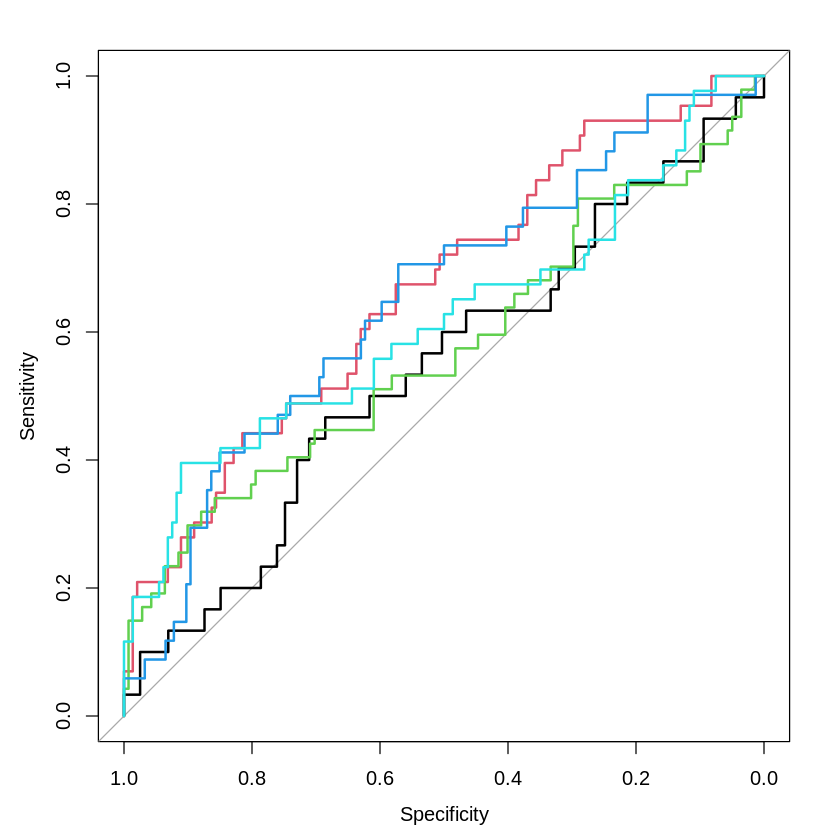

In [ ]:


# Train initial classifier and analyze performance using K-fold cross-validation
K <- 5
skf <- createFolds(y_df$label, k = K, list = TRUE, returnTrain = TRUE)

mean_tpr <- 0.0
mean_fpr <- seq(0, 1, length.out = 100)
roc_aucs_xgb1 <- c()

for (i in 1:K) {
  train_indices <- skf[[i]]
  test_indices <- setdiff(seq_len(nrow(x_df)), train_indices)

  X_train <- x_df[train_indices, ]
  y_train <- y_df$label[train_indices]
  X_valid <- x_df[test_indices, ]
  y_valid <- y_df$label[test_indices]

  class_weight_scale <- sum(y_train == 0) / sum(y_train == 1)
  print(paste('class weight scale :', class_weight_scale))

  param$scale_pos_weight <- class_weight_scale
  dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
  dvalid <- xgb.DMatrix(data = as.matrix(X_valid), label = y_valid)

  xgb1 <- xgb.train(params = param, data = dtrain, nrounds = 100)
  xgb1_pred_prob <- predict(xgb1, as.matrix(X_valid))

  # Debugging: Check predicted probabilities
  print(head(xgb1_pred_prob))

  # Create ROC object
  roc_obj <- roc(response = y_valid, predictor = xgb1_pred_prob)

  # Debugging: Inspect ROC object
  print(roc_obj)

  # Calculate AUC using pROC::auc()
  auc_value <- pROC::auc(roc_obj)
  roc_aucs_xgb1 <- c(roc_aucs_xgb1, auc_value)

  # Plot ROC curve
  plot(roc_obj, col = i, add = i != 1)
}

mean_auc <- mean(roc_aucs_xgb1)
print(paste('Mean AUC:', mean_auc))

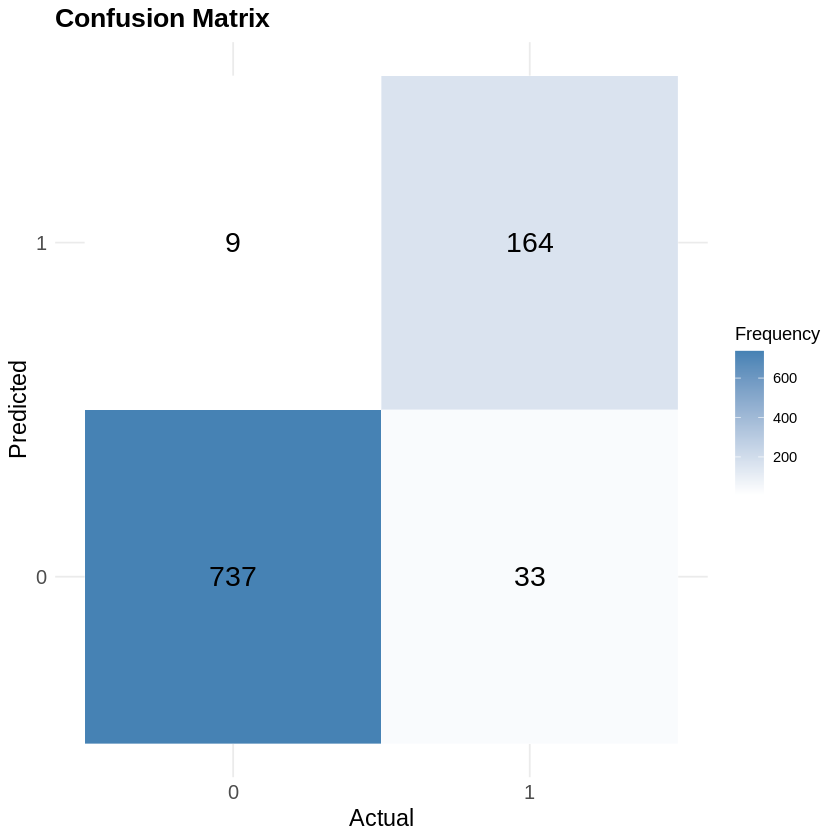

In [ ]:


# Initialize variables to store aggregated predictions and true labels
all_predictions <- c()
all_true_labels <- c()

# Loop through each fold to collect predictions and true labels
for (i in 1:K) {
  train_indices <- skf[[i]]
  test_indices <- setdiff(seq_len(nrow(x_df)), train_indices)

  X_valid <- x_df[test_indices, ]
  y_valid <- y_df$label[test_indices]

  # Make predictions on the validation set
  xgb1_pred_prob <- predict(xgb1, as.matrix(X_valid))

  # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
  xgb1_pred_binary <- ifelse(xgb1_pred_prob > 0.5, 1, 0)

  # Append predictions and true labels
  all_predictions <- c(all_predictions, xgb1_pred_binary)
  all_true_labels <- c(all_true_labels, y_valid)
}

# Calculate the confusion matrix
conf_matrix <- confusionMatrix(as.factor(all_predictions), as.factor(all_true_labels))

# Convert confusion matrix to a data frame for plotting
conf_matrix_df <- as.data.frame(conf_matrix$table)

# Plot the confusion matrix using ggplot2
ggplot(conf_matrix_df, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), color = "black", size = 6) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(
    title = "Confusion Matrix",
    x = "Actual",
    y = "Predicted",
    fill = "Frequency"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )